# Take-Home Challenge

### Personal Identification
Fill here your personal information to accelerate the assessment by our team, please include the following information into the final file:


* **Your name:** **<font color=red|blue\black>Lívia Clarete</font>**
* **Link to your Git and LinkedIn profile**: *https://www.linkedin.com/in/liviaclarete/*

### Guidelines
* We expect that the test should take around 4 hours to do. However, we strongly advise you to carefully read this assignment, think about approaches and try to understand the data before diving into the questions. You are free to spend as much time on it as you want, in the timeframe given by our recruiter.
* In case of using this Google Colab, you'll need to upload the files on google drive folder given to you (*listings.html, properties.csv*) running the cell below. 
* If you want to use some python packages that are not yet installed on this notebook, use !pip install package.

In [84]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Extraction (CSS + REGEX)

Casafari tracks the entire real estate market by aggregating properties from thousands of different websites. The first step of this process is to collect all the relevant information using web crawlers. This task will give a brief overview of how this extraction is made. 

The task consists of 3 parts, which will evaluate your skills in CSS3 selectors and regular expressions knowledge, which are essential to data extraction processes. We believe that even if you do not have previous knowledge of CSS, HTML and REGEX, you should be able to complete this task in less than a hour. There are many tutorials and informations on how to use CSS3 selectors and regular expressions to extract data. Do not be afraid to google it! This task is also a evaluation of your learning capabilities.

The normal questions already have some examples and can be solved only by filling the CSS3 selectors or the regular expressions in the given space. You can check if you have the correct results by running the pre-made script after it. However, if you feel comfortable, you can use another python package and rewrite the script in a similar way to extract the data.

For the extra challenges, you'll need to construct the scripts from scratch.

__(1)__ For the following task, use the _listing.html_ file, which represents a listings for a property. Open the HTML file on your browser, investigate it with the Inspect tool, view the source code and explore it. 
After that, fill the CSS3 selectors in the following script to extract the following information about this property:

* Number of bathrooms
* Number of bedrooms
* Living Area
* Energy Rating
* Description
* Agent Name
* Extract the location of the property

In [85]:
!pip install lxml
!pip install cssselect

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [6]:
# EXAMPLE SELECTOR TO EXTRACT THE PROPERTY TYPE
Selector_Example = "h1.lbl_titulo"

In [7]:
# EXAMPLE CODE, RUN TO CHECK THE EXAMPLE SELECTOR 

from lxml import html,etree

with open(r'listing.html', "r") as f:
    page = f.read()
tree = html.fromstring(page)

print('Example -> Property type: {}'.format(tree.cssselect(Selector_Example)[0].text))

Example -> Property type: 3 Bedroom House


In [8]:
############## Q1 ANSWERS ##################
Selector_1 = ".bloco-dados > li > span"
Selector_2 = ".bloco-dados > li > span"
Selector_3 = ".bloco-dados > li > span"
Selector_4 = ".bloco-dados > li > span"
Selector_5 = "p"
Selector_6 = "div.lbl_titulo"
Selector_7 = ".lbl_morada"

In [9]:
############### RUN TO CHECK YOUR ANSWERS ##################
# index from the first 4 print functions were changed in order to select the correct values
print('Bathrooms: {}'.format(tree.cssselect(Selector_1)[3].text))
print('')
print('Bedrooms: {}'.format(tree.cssselect(Selector_2)[4].text))
print('')
print('Total area: {}'.format(tree.cssselect(Selector_3)[2].text))
print('')
print('Living area: {}'.format(tree.cssselect(Selector_4)[1].text))
print('')
print('Description: {}'.format(tree.cssselect(Selector_5)[0].text))
print('')
print('Agent name: {}'.format(tree.cssselect(Selector_6)[0].text))
print('')
print('Location: {}'.format(tree.cssselect(Selector_7)[0].text))

Bathrooms:  1 

Bedrooms:  2 

Total area:  0 m

Living area:  80 m

Description: At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident, similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fugaEt harum quidem rerum facilis est et expedita distinctio.Nam libero tempore, cum soluta nobis est eligendi optio cumque nihil impedit quo minus id quod maxime placeat facere possimus, omnis voluptas assumenda est, omnis dolor repellendus.

Agent name: Agent John Doe

Location: Portugal, Lisboa, Estrela, Lapa


### Extra Challenge

To deal with the extra challenge, it was used the library scrapy, and the Xpath:

##### scrapy provides a complete framework to crawl data
* https://scrapy.org/

##### xpath is a small language to navigate in hierarchic of XML tree
* https://www.w3.org/TR/2017/REC-xpath-31-20170321/

In [10]:
# install scrapy, a framework focused on crawling
! pip install scrapy

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# EXTRACT DATA USING XPATH: SET THE FUNCTION

from scrapy import Selector

def xpath_exctact_values(list_xpaths):
    # read the html file
    with open(r"page.html", "r") as file: 
        page = file.read()
    # call Selector function from scrapy on a html file
    sel = Selector(text=page, type='html')
    # iterate through each a list of xpaths elements
    xpath_values = [sel.xpath(val).extract() for val in list_xpaths]
    # flat the nested list
    xpath_values_flat = [x for k in xpath_values for x in k]
    return(xpath_values_flat)

In [12]:
# EXTRACT DATA USING XPATH: SET THE SELECTORS FOR EACH REQUIRED DATA

# conditon, living area, total area, bathrooms, bedrooms, energy rating, consturction year, ID property
# labels
xpath_bloco_dados_labels = ["//ul[@class='bloco-dados']//li//b/text()"]
# values
xpath_bloco_dados_values = "//ul[@class='bloco-dados']//li//span/text()"

# description
xpath_description_values = "//p//text()"
# agent name
xpath_agent_values = "//div[@class = 'lbl_titulo']//text()"
# location
xpath_location_values = "//div[@class = 'bloco-imovel-galeria']//span[@class = 'lbl_morada']//text()"

# list of all xpath selectors
xpaths_values = [xpath_bloco_dados_values, 
                 xpath_description_values, 
                 xpath_agent_values, 
                 xpath_location_values]

In [13]:
# EXTRACT DATA USING XPATH: CALL THE FUNCTION ON THE SELECTORS

# Extract values
property_values = xpath_exctact_values(xpaths_values)

# Extract labels
property_labels = xpath_exctact_values(xpath_bloco_dados_labels)

# Set additional labels
property_columns = property_labels + ['Description', 'Agent Name', 'Location']

In [14]:
# STRUCTURE THE COLLECTED DATA WITH PANDAS -- Python's "Excel" library :) 

import pandas as pd

# concat the lists of properties' values and columns into a single data frame
df_property = pd.DataFrame([property_values], 
                            columns=property_columns)

# subset the data frame according to the task description
task_col = ['Bathrooms:',
            'Bedrooms:',
            'Total Area:',
            'Living Area:',
            'Energy Rating:',
            'Description', 
            'Agent Name', 
            'Location']

# slice the property's dataset, selecting the required columns
df_property_task = df_property[task_col]

In [15]:
# CLEAR DATA COLUMN'S NAMES

# function that clear ':' and replaces bank spaces by '_'
def clean_columns(col):
    return col.lower().replace(':', '').replace(' ', '_')
  

# call the clean_column on df_property_task columns' name  
df_property_task.columns = [clean_columns(col) for col in df_property_task.columns]

In [16]:
# HANDLING MISSING AND INADEQUATE VALUES

# numpy is a Python lib that works with a type of data structure called 'arrays'
# It is similar to a list, but it only stores the same data type and is computational faster compared to other structures
# Pretty commun to perform scientific computation
import numpy as np

# It is not logical a property total area of 0m, and so let's substitute the strange value by a NaN using Numpy
# NaN stands for Not a Number and means an unrepresentable or missing value
df_property_task.total_area = np.nan

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
# CHECK THE DATA 

df_property_task.head()

,bathrooms,bedrooms,total_area,living_area,energy_rating,description,agent_name,location
0,1,2,NaN,80 m,C,At vero eos et accusamus et iusto odio digniss...,Agent John Doe,"Portugal, Lisboa, Estrela, Lapa"


In [18]:
# READ TO EXPLORATORY DATA ANALYSIS (EDA)

# or almost: the dataset would be ready to be analysed if it had more quality data at least beyond the magic number of 30 cases
# https://www.researchgate.net/post/What_is_the_rationale_behind_the_magic_number_30_in_statistics

print(df_property_task.describe())
print(df_property_task.info())

       total_area
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
bathrooms        1 non-null object
bedrooms         1 non-null object
total_area       0 non-null float64
living_area      1 non-null object
energy_rating    1 non-null object
description      1 non-null object
agent_name       1 non-null object
location         1 non-null object
dtypes: float64(1), object(7)
memory usage: 144.0+ bytes
None


__(2)__ In the second part you will still have to use the html file. However, this time, you should use regular expressions to extract the following data from the webpage:

* Urls that are links to listings (i.e.: http://mydomain.com/link-to-listing). Do not use the whole url itself in regular expression. It should select only 3 links.
* The agent telephone number
* The property price

In [19]:
# REGEXP EXAMPLE TO EXTRACT THE AGENT EMAIL
Regexp_Example = r"\">(.*?@.*?)<"

In [20]:
# RUN TO CHECK THE EXAMPLE RESULTS
import re

with open(r'listing.html', "r") as f:
    page = f.read()

print("Email extracted: {}".format(re.findall(Regexp_Example, page)[0]))

Email extracted: casa@casa.pt


In [21]:
# WRITE YOUR REGULAR EXPRESSIONS HERE
Regexp_1 = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
Regexp_3 = r"[1-9][0-9 .]{9}"
Regexp_2 = r"\d+\-\d+"

In [22]:
############### RUN TO CHECK YOUR ANSWERS ##################
print('Links extrated:')
for w in re.findall(Regexp_1, page):
  print(w)
print('')
print("Agent Phone Number: {}".format(re.findall(Regexp_2, page)[0]))
print('')
print("Property price: {}".format(re.findall(Regexp_3, page)[0]))

Links extrated:
http://mydomain.com/link-to-image
https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Ranch_style_home_in_Salinas%2C_California.JPG/220px-Ranch_style_home_in_Salinas%2C_California.JPG
http://mydomain.com/link-to-listing
http://mydomain.com/link-to-listing
http://mydomain.com/link-to-listing

Agent Phone Number: 0800-1111

Property price: 1.500.000 


***

__Extra Challenge__:

Write from scratch a script to extract and print:
* One link that leads to http://mydomain.com/link-to-image
* Extract all the features of the property 
*** The features were extracted in the previous lines

In [23]:
# print the first element that leads to http://mydomain.com/link-to-image

xpath_first_element_link = ["//a[@class = 'pref-property-container']//@href"]
print(xpath_exctact_values(xpath_first_element_link)[0])

http://mydomain.com/link-to-image


__Extra Challenge__
* Extract latitude and longitude value from html ()_those values are in the html code, but are not shown on the page__)

In [24]:
############### WRITE THE SCRIPT TO SOLVE THE EXTRA CHALLENGE HERE ##################

# define coordinates xpath
geo_coord_xpath = ['//@data-coorgps']

geo_coord = (xpath_exctact_values(geo_coord_xpath))
latitude, longitude = geo_coord[0].split(",")
print('Latitude = {} \nLongitude = {}'.format(latitude, longitude))


Latitude = 36.5194999 
Longitude = -4.7743365


* Just being curious about how far am I from my analytical object, let's import geopy and compare the distance from the property from myself

In [25]:
! pip install geopy

    100% |████████████████████████████████| 102kB 608kB/s a 0:00:01
  Stored in directory: /Users/liviaclarete/Library/Caches/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
# import geopy to get Rio' geo coordinate and to calculate the geodesic distance from the property
from  geopy.geocoders import Nominatim
from geopy.distance import geodesic

geolocator = Nominatim()

loc = geolocator.geocode('Rio de Janeiro, Brazil')
rio_geo_coord = (loc.latitude, loc.longitude)

property_geo_coord = (float(latitude), float(longitude))

print('Rio is {} from the property'.format(
    geodesic(rio_geo_coord, property_geo_coord)))


/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


Rio is 7718.818224369325 km from the property


# Data Analysis (Python)


You obtained all the data that you need and you now need to run an analysis on the following problem. For this part, feel free to use as many cells as you need below this point. Please use properties.csv as your data source.



## Problem 
A private investor is planning an investment in one of the four locations. In order to decide where to invest he needs to know the price impact of such features as ‘pool’, ‘sea view’ and ‘garage’ on properties in each location.
He also asks for the mean price of the properties in each type group (‘apartments’, ‘houses’, ‘plots’) and wants to know about properties in the market that are undervalued and overvalued. In order to accomplish the problem that was described we want you to cover the following steps:

###Part 1: Data Cleaning
As you have seen previously, a lot of information is present in the title/features fields. From there, we want to extract the relevant information for further analysis, such as:
 - 1A: Property  **type** (as presented in **Details** above) of each property from **title** field
 - 1B: Property **location** (as presented in **Details** above) of each property from ** title** field
 - 1C: From ** features** field, if a property has:
  - a pool
  - a garage
  - sea view

####Deliverables part 1:
- Create a property dataset with the following schema and save it in a csv file:
  - id; location name; type; title; features; pool (0/1); sea view (0/1); garage (0/1);
  - pool, sea view, garage should be binary - 1 if the property has the feature and 0 if not
- For each of the 3 tasks (1A, 1B, 1C), describe in detail the what you did. What are the advantages and disadvantages of your approach?
-  Please provide your code in the cells below, in a reproducible and understandable way;

###Part 2: Identify outliers
Now that the data is structured correctly, let's look at which properties are a  good deal for our investor. For this you will need to identify undervalued, overvalued, and normal properties in the dataset. Please use any model you find appropiate in order to obtain this.
####Deliverables part 2:
- As before, deliver a csv file with the following format:
  - id; location name; type; area; price; **over-valued (0/1), under-valued (0/1), normal (0/1)**
 - the new columns should be binary, where for example **over-valued** column would get value 1 if the property is indeed over-valued, 0 otherwise;
- A short report (could be a pdf file or new cells within the notebook) containing:
  - visualizations (such as scatter plots) discriminating between the undervalued, overvalued and normal properties;
  - a explanation of what is the difference between under-valued/over-valued properties and pure data outliers;
  - any notes/conclusions you wish to add;
- Your code, in the cells below;

###Part 3: Theoretical questions
- Mention at least 2 hidden traps you found while solving the problems and what would help you to clean the data set;
- Describe in detail how you would evaluate the price impact of features such as sea view, pool and garage considering the dataset provided. Your answer should also include how would you deal with missing values, outliers and duplicated listings (same property listing published by different agencies);

####Extra challenge:
- Describe how would you model the data over time (using createdAt field). What changes over time would you look for and what would you expect the outcomes to be? (i.e. in terms of pricing per location/type)

## Loading and checking csv file

In [27]:
# LOAD CSV FILE USING PANDAS
import pandas as pd ## as previously imported

# read data parsing the col 'created_at' as of date format and index
data_path = 'properties.csv'
na_elements = [0.0, None, ".", ", ,", ";", ",", '------  ------  ------']

properties = pd.read_csv(data_path,
                 # read 'created_at' coluns as a data type
                 parse_dates=['created_at'],
                 # set the date column 'created_at' and the 'id' as a hierarchical index
                 index_col= ['created_at', 'id'],
                 # 0.0 as NA values as it is not possible a living, total or plot are equal to 0.0
                 na_values=na_elements,
                 # encoding text
                encoding='utf8')

In [28]:
# sort the index by 'created_at'
properties = properties.sort_index()

In [29]:
# check if the data was correctly loaded
properties.head()

title  \
created_at id                                                           
2017-01-01 1509380               Moradias, Cascais, Quinta da Marinha   
           1563980  Quinta - Venda - Abrigada e Cabanas de Torres,...   
           1641927    New modern villa for sale in Nagueles, Marbella   
           1884828                   Excelente moradia T4 em Alenquer   
           2546019  Moradia - T2 - Venda - Alenquer (Santo Estêvão...   

                                                             features  \
created_at id                                                           
2017-01-01 1509380                                             Alarme   
           1563980                                   Campo, Montanhas   
           1641927  SOUGHT AFTER AREA, \r\n\t\t4 EN-SUITE BEDROOMS...   
           1884828                         Varanda,  Cozinha Equipada   
           2546019                                      Jardim, Campo   

                    living_area  total_area  plot_area      price  agent_id  
created_at id                                                                
2017-01-01 1509380        118.0         NaN        NaN   650000.0       139  
           1563980          NaN   2230000.0    48000.0  3000000.0       122  
           1641927          NaN       844.0     1910.0  2671000.0       160  
           1884828        258.0         NaN        NaN   285000.0       120  
           2546019          NaN        51.0      191.0    38500.0       179

In [30]:
# check the number of rows (cases), and columns (variables)
print('The dataset is composed by {} columns and {} rows'.format(properties.shape[1], properties.shape[0]))

The dataset is composed by 7 columns and 4910 rows


In [31]:
# check data types, and missing values
print(properties.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4910 entries, (2017-01-01 00:00:00, 1509380) to (2018-07-31 00:00:00, 3360813)
Data columns (total 7 columns):
title          4910 non-null object
features       3955 non-null object
living_area    892 non-null float64
total_area     3660 non-null float64
plot_area      1810 non-null float64
price          4677 non-null float64
agent_id       4910 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 330.7+ KB
None


## Preprocessing data

Preprocessing is the first step before the analysis, and would include some steps such normalizing the data.

In [32]:
# transform features from object to a categorical variable
properties['features'] = pd.Categorical(properties['features'].str.lower())
properties['title'] = pd.Categorical(properties['title'].str.lower())

# fill NA values with a string to avoid NAN as a type float
properties['features_categ'] = properties['features'].cat.add_categories("").fillna("")

# concating text data, columns 'features' and 'title', into a single column
properties['text_data'] = properties['features_categ'].astype(str) + properties['title'].astype(str)

# normalize text data
properties['title'] = properties.title.apply(
    lambda x: x.replace('town house', 'townhouse'))

# check the type of 'features' column
properties.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4910 entries, (2017-01-01 00:00:00, 1509380) to (2018-07-31 00:00:00, 3360813)
Data columns (total 9 columns):
title             4910 non-null category
features          3955 non-null category
living_area       892 non-null float64
total_area        3660 non-null float64
plot_area         1810 non-null float64
price             4677 non-null float64
agent_id          4910 non-null int64
features_categ    4910 non-null category
text_data         4910 non-null object
dtypes: category(3), float64(4), int64(1), object(1)
memory usage: 792.2+ KB


#### Normalize text data: translate all data into English
The text data from columns 'features' and 'title' are presented in three languages: English, Portuguese, and Spanish. In order to save some time building regular expressions in three idioms, it is worth to translate the text.

We can use at least three options:
* googletrans
* py-translate
* goslate

Those libraries use online tools to translate data. And so, we may experience some problems with the number of requests -- as we can see bellow while using goslate.

![title'](https://scontent-gig2-1.xx.fbcdn.net/v/t1.0-9/61269798_2690834807600240_4555294686968807424_n.jpg?_nc_cat=110&_nc_ht=scontent-gig2-1.xx&oh=2bb486cdc213afdf1690676b3d0089b4&oe=5D9E7745)


Alternative:

* __Google apps__:
Google is much more benevolent inside its native apps. And so, we used Sheet api via pySheet. Basically we export, translate and retrieve the data virtually in a GSheet from a python environment. Unfortunally, Google requires a manual loggin process for new users and a boring manual verification process -- otherwise I would show you.


In [33]:
# ! pip install googletrans
# ! pip install py-translate
# ! pip install goslate

# import goslate
# trans_list = []
# for i in properties['text_data'].values:
#    trans_list.append(goslate.Goslate().translate(i, 'en'))
    
    


# from googletrans import Translator
# translator = Translator()
# properties['text_en'] = properties['text_data'].apply(translator.translate, 
#                                      src='auto',  
#                                      dest='en').apply(getattr, args=('text',))

## Data cleaning (drop duplicated rows)

The first step in order to clean the data is identifying the duplicated values. To perform the task we’ve dropped the valid cases of simultaneously duplicated features, titles, and price rows. Properties with same ‘features’, and ‘title’ but different prices were maintained, and considered as different cases — as they could indicate an change on price market or even a different property in the same building.

We also chose a manually selection process, of dropping the duplication, instead of the direct path of 
* properties.drop_duplicates(subset=['features','title', 'price'])

in order to make sure to delete only the valid cases. 

In [34]:
# select valid cases from cols 'features', 'title', and 'price'
features_title_notnull = properties[
    properties.features.notnull() & 
    properties.title.notnull() &
    properties.price.notnull()
]

# select duplicated simultaneous cases from cols 'features', 'title', and 'price' 
duplicated_features_title = features_title_notnull[
    features_title_notnull.features.duplicated() & 
    features_title_notnull.title.duplicated() &
    features_title_notnull.price.duplicated()
]

# drop the duplicated cases
properties_unique = properties.drop(
    duplicated_features_title.index)

After dropping 352 identified identical cases, let's continue with feature extraction. We're gonna perform that process before cleaning NA values, as we may extract features that could help us identify enrich the data before giving up on some of rows or columns.

Data is precious and we don't wanna waste that resources before trying some methods.

In [35]:
# check the number of rows (cases), and columns (variables)
print('The dataset is composed by {} columns and {} rows'.format(
    properties_unique.shape[1], properties_unique.shape[0]))

The dataset is composed by 9 columns and 4558 rows


## Feature extraction - text data

* Exploring possible features to be extracted from columns the text columns 'features', and 'title';

Brokers would follow their guts while writing a description about the property. Assuming they included additional features that would call the attention from the clients, we may want to test if the most mentioned features have any impact on the price

* Enriching missing values from columns 'plot_area' 

Let's start with a word cloud to visualize what are the most mentioned words

In [36]:
! pip install matplotlib
! pip install seaborn
! pip install wordcloud

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [37]:
# visualize the most mentioned features

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

def word_cloud_figure(col,
            max_words=None,
            background_color='white',
            stopwords=None):
    string_text = str(col)
    wordCloud = WordCloud(max_words=max_words,
                        repeat=False,
                        stopwords=stopwords,
                        background_color=background_color
                        ).generate(string_text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    return(plt.show())

* At a first glance, the word cloud presented the features 'air conditioning', 'plot size', garden, etc, as the most mentioned -- which could be interesting to analyse;


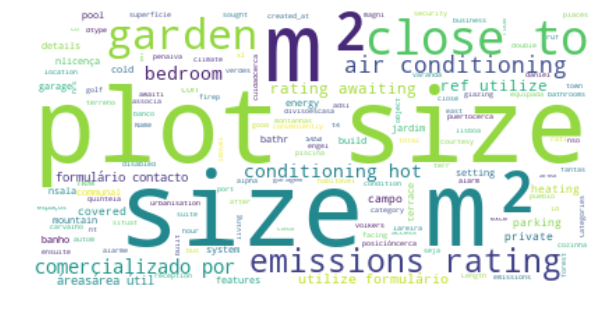

In [38]:
word_cloud_figure(properties_unique['features'], 
                  stopwords=['NaN', 'de'])

* The variable 'title' presents the location, the type of build, and the type of negotiation (sale/ rent)

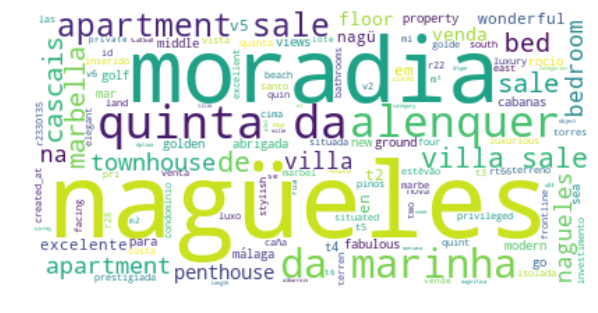

In [39]:
word_cloud_figure(properties_unique['title'])

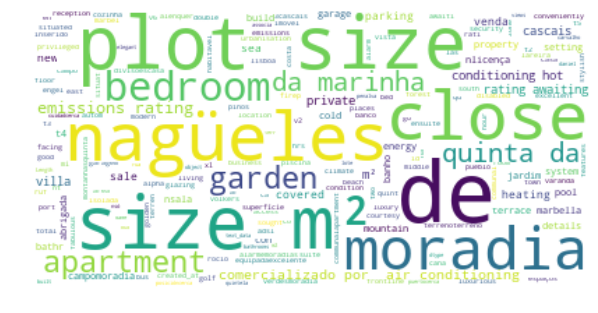

In [40]:
word_cloud_figure(properties_unique['text_data'])

In [41]:
# EXTRACTION THE MOST MENTIONED FEATURES 

# import Counter to calculate the frequency of each feature inside 'features' column
from collections import Counter

# returns a data frame with the counts of words and expressions in a column
def count_words(col, n_words=11):
    list_df = []
    # iterate through each line from the properties['features'] serie
    for i in col:
    # split the text from each line
        t = i.split(',')
        # iterate in each features
        for k in t:
            # append the resoults in a list
            list_df.append(k)
    # calculate the top 10 features        
    top10_features = Counter(list_df).most_common(n_words)
    # drop the 'na' values
    del top10_features[0]
    # tranform a list of tuples from the 'top10_features' object into a dataframe
    # dataframe is a easier data type to plot charts
    features = pd.DataFrame(top10_features, 
                           # name the columns
                           columns=['label', 'counts'])
    # set the index
    features.index = features.label
    # drop the repeated column 'label'
    features = features.drop('label', axis=1)
    # calculate the proportion from the total number of cases
    features['prop'] = round(features['counts']/4910*100)
    print(features)
    return(features)

# call the count_word function and returns a chart
def count_chart(col, n_words=11):
    # plot the counts of each feature
    ax = count_words(col, n_words).counts.sort_values(ascending=True).plot(kind='barh',color='#DB7093')
    # set the label from the axis 'x'
    plt.xlabel("Features", fontsize=15)
    # set the label from the axis 'y'
    plt.ylabel("Count", fontsize=15)
    # set the title
    plt.title("The most mentioned features", fontsize=20)

    # set the style
    # set a cleaner chart view
    sns.despine(
        # exclude the moldure
        trim=10,
        # get some space from the axis
        offset=10)

    print(ax)
    return(plt.show())

                                counts  prop
label                                       
 marbella                          274   6.0
000                                270   5.0
apartment for sale in nagüeles     225   5.0
 málaga                            171   3.0
villa for sale in nagüeles         167   3.0
 spain                             165   3.0
 cascais                           156   3.0
townhouse for sale in nagüeles     151   3.0
 quinta da marinha                 141   3.0
 alenquer                          130   3.0
AxesSubplot(0.125,0.125;0.775x0.755)


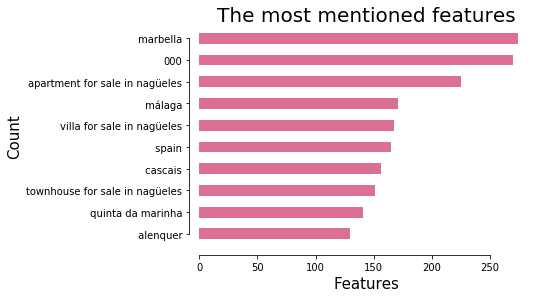

In [42]:
count_chart(properties_unique.title)

                   counts  prop
label                          
 private terrace      820  17.0
 fitted wardrobes     719  15.0
 marble flooring      549  11.0
 close to schools     539  11.0
 double glazing       498  10.0
 storage room         471  10.0
 ensuite bathroom     462   9.0
 utility room         443   9.0
 close to town        441   9.0
 near transport       380   8.0
AxesSubplot(0.125,0.125;0.775x0.755)


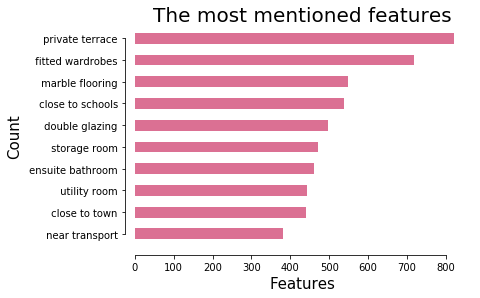

In [43]:
count_chart(properties_unique.features_categ)

In [44]:
##### Create new features

# returns a new df based on regex pattern
def new_features(patterns, col):
    # iterate through each dictionary item and extract regex pattern
    list_pattern = [col.str.contains(pattern, na=None) 
                    for label, pattern in patterns.items()]
    # concat the list of patterns into a data frame
    df = pd.concat(list_pattern, axis=1)
    # replace the False values by NA's
    df = df.replace(False, '0')
    df = df.replace(True, '1')
    # set the key values from the dict pattern as column's lables
    df.columns = [label for label, pattern in patterns.items()]
    # convert object to numeric with pd.to_numeric
    new_list = [pd.to_numeric(df[i]) for i in df.columns]
    # concat the new list
    df_numeric = pd.concat(new_list, axis=1)
    return(df_numeric)


# transform the binary columns into a single one
def one_col(df):
    list_cols = df.columns.values
    len_list_cols = len(df.columns.values)
    for i, k in enumerate(list_cols):
        df[k] = df[k].replace(1, list_cols[i])
        df[k] = df[k].replace(0, "")
        one_col = df.sum(axis=1)
    return(one_col)

In [45]:
# regex patterns for each feature

regex_features = {'fireplace': r'/*fireplace?',
                  'terrace': r'/*terrace',
                  'pool': r'pool',
                  'suite': r'/*suite',
                  'wardrobe': r'/*wardrobe',
                  'central_heating': r'/*heating',
                  'lift': r'/*lift|elevator',
                  'penthouse': r'/*penthouse',
                  'beach': r'/*beach',
                  'garden': r'/*garden?',
                  'alarm_system': 'r/*alarm|ecurity',
                  'jacuzzi': r'/jacuzzi',
                  'gym': r'gym',
                  'sea_view': r'sea view',
                  'mountain': r'mountain view',
                  'garage': r'garage',
                  'floor': r'marbel floor',
                 }

regex_location = {'marbella':r'/*nag.eles|/*marbella|golden.mile|/*m.laga',
                  'cascais':r'cascais|quinta da Marinha',
                  'alenquer':r'/*alenquer'
                    }

regex_country = {'spain':r'/*marabel.|nag.eles|spain|spanish|espa[nñ]a|espanha',
                    'portugal': r'/*cascais|quinta|alenquer|portugal'
                    }

regex_type = {'penthouse': r'penthouse',
             'townhouse': r'townhouse',
             'apartment': r'apartment',
             'villa': r'villa[a\s]',
             'loft': r'/*loft',
             }

regex_deal = {'rent':'^rent|\srent|aluguel|aluga|alquilar',
                    'sale':r'sale|ven[dt]*|aquisi|purcha'}

total_regex = [regex_features, 
              regex_location, 
              regex_country, 
              regex_type, 
             regex_deal]


In [46]:
# call the function new_features on each of the dict of expressions
list_features = []
for i in total_regex:
    list_features.append(new_features(i, properties_unique['text_data']))
    
# concat the list into a dataframe    
df_features = pd.concat(list_features, axis=1)

# concat the currently df with the features_df
properties_features = pd.concat([properties_unique, df_features], axis=1)

In [47]:
# call new_features function on each of the regex
df_country = new_features(regex_country, properties['text_data'])
properties_features['country'] = one_col(new_features(
    regex_country, properties['text_data']))

df_deal = new_features(regex_deal, properties['title'])
properties_features['deal'] = one_col(new_features(
    regex_deal, properties['title']))

df_type = new_features(regex_type, properties['title'])
properties_features['type'] = one_col(new_features(
    regex_type, properties['title']))

df_location = new_features(regex_location, properties['text_data'])
properties_features['location'] = one_col(new_features(
    regex_location, properties['text_data']))

Our new working dataset has 35 new columns compared to the original one:

In [48]:
# check the number of rows (cases), and columns (variables)
print('The dataset is composed by {} columns and {} rows'.format(
    properties_features.shape[1], properties_unique.shape[0]))

The dataset is composed by 42 columns and 4558 rows


## Data cleaning 2: Handling NA

Missing data could be described as a nonresponse, a misplaced or even research deliberate choice of giving up on some unuseful information. In summary, it is the lack of information related to some question/ variable.

There is an effervescent academic discussion about how much missing data is ok to still consider the variable. It would depend on the data set as a whole, the total number of cases, and the subject explored. Despite the debate, the literature conveys to a "magic" proportion that gravitates from at least 60% to 70% of valid cases.

******

The columns 'plot_area' and 'living_area' have less than 70% of valid cases. The literature advises us to avoid perform any analysis with less than 70%.

So, let's discuss about the best method to handle NA:

* __Method 1__: if our project question is related 'plot_area' and/ or 'living_area', we should drop the missing lines and work with a small dataset. It cautions about the results, as it may lead to biased results;

* __Method 2__: drop the coluns 'plot_area' and 'living_area' from the dataset;

* __Method 3__: input values using the mean, median, or a customer equation. Imputation is recommended when variables also have more than 70% of valid cases -- which could be applied to the columns 'price', 'features', and 'total_area'

* __Method4__: predict the missing values based on algorithms such as logistic regression or knn.

In [49]:
# proportion of missing values in each variable
valid_cases = pd.DataFrame(round((
    properties_features.notna().sum()/ properties.shape[0])*100, 2)
                          ).sort_values(by=0, ascending=False)

# rename columns
valid_cases.columns = ["percent_valid"]

        
# select the variables with 70% or more of valid cases
valid_cases["feature_selection"] = ["Ok" if i >= 70 else "Less than 70% - poor analysis" 
                                    for i in valid_cases['percent_valid']]

print(valid_cases)

                 percent_valid              feature_selection
title                    92.83                             Ok
sea_view                 92.83                             Ok
garage                   92.83                             Ok
floor                    92.83                             Ok
marbella                 92.83                             Ok
cascais                  92.83                             Ok
alenquer                 92.83                             Ok
spain                    92.83                             Ok
portugal                 92.83                             Ok
penthouse                92.83                             Ok
townhouse                92.83                             Ok
apartment                92.83                             Ok
villa                    92.83                             Ok
loft                     92.83                             Ok
rent                     92.83                             Ok
sale    

### Missing values of quantitative columns and the relationship among ('total area', 'plot area', 'living_area') and 'price' 

The data is so heterogeneous that we can't graphically visualize a relationship among them:

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


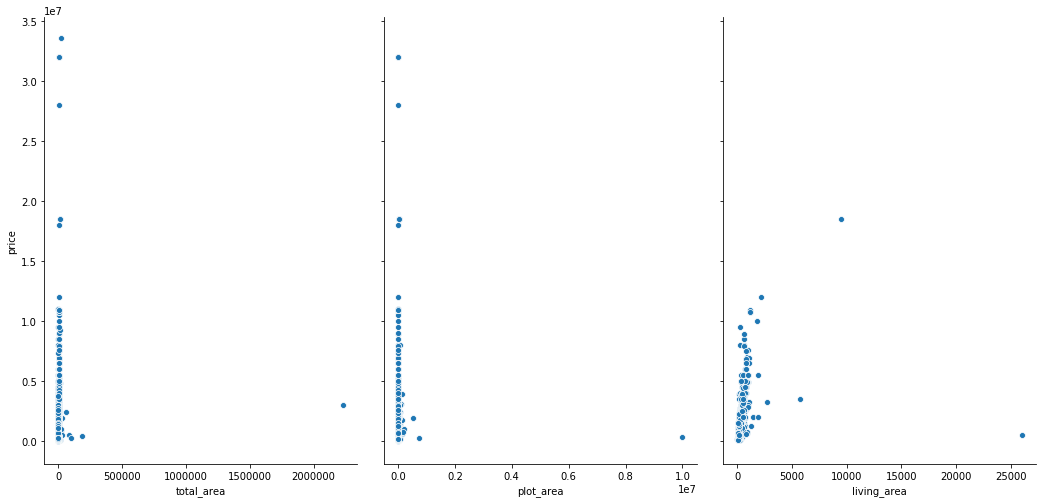

In [50]:
sns.pairplot(properties_features, 
             x_vars=['total_area','plot_area','living_area'], 
             y_vars='price', 
             size=7, 
             aspect=0.7)

__Price X area__

As data is quite heterogeneous, let's remove 30% of outliers prices and explore the relationship between 'price per m2', just as an experiment:

* After removing 30% of heterogeneus data, we can see a trend: a linear relationship between price and area, as expected;

* Despite the data is more clear, we've lost at least 70% of data. So maybe it is worth to proceed with the whole dataset, and not with the clearest one, and try to predict the price.

In [51]:
# remove outliers

def remove_outliers(col, q=0.3):
    upper = col.quantile(1-q)
    lower = col.quantile(q)
    mask = (col < upper) & (col > lower)
    return mask  

In [52]:
# create price per m2 of each area
properties_features['price_m2_total'] = pd.to_numeric(
    properties_features.price.div(properties_features.total_area))

properties_features['price_m2_plot'] = pd.to_numeric(
    properties_features.price.div(properties_features.plot_area))

properties_features['price_m2_living'] = pd.to_numeric(
    properties_features.price.div(properties_features.living_area))


3281 outliers of "total_area" were removed.


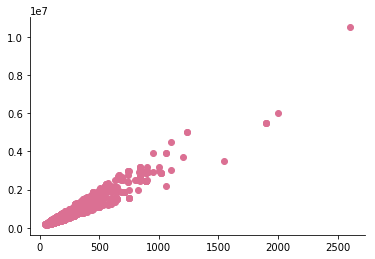

In [53]:
# TOTAL AREA

# call remove outliers and create a mask
price_no_outliers_mask = remove_outliers(properties_features.price_m2_total)
# remove the outliers
price_no_outliers = properties_features[price_no_outliers_mask]

print('{} outliers of "total_area" were removed.'.format(properties_features.shape[0]-price_no_outliers.shape[0]))

# plot the relationship between price and area
plt.scatter(price_no_outliers.total_area, price_no_outliers.price,
           color='#DB7093')
sns.despine()

3924 outliers of "plot_area" were removed.


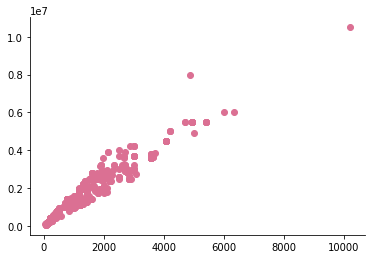

In [54]:
# PLOT AREA

# call remove outliers and create a mask
price_no_outliers_mask = remove_outliers(properties_features.price_m2_plot)
# remove the outliers
price_no_outliers = properties_features[price_no_outliers_mask]

print('{} outliers of "plot_area" were removed.'.format(properties_features.shape[0]-price_no_outliers.shape[0]))

# plot the relationship between price and area
plt.scatter(price_no_outliers.plot_area, price_no_outliers.price,
           color='#DB7093')
sns.despine()

4239 outliers of "living_area" were removed.


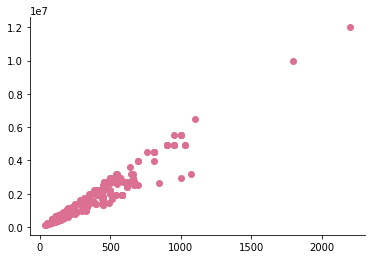

In [55]:
# LIVING AREA

# call remove outliers and create a mask
price_no_outliers_mask = remove_outliers(properties_features.price_m2_living)
# remove the outliers
price_no_outliers = properties_features[price_no_outliers_mask]

print('{} outliers of "living_area" were removed.'.format(properties_features.shape[0]-price_no_outliers.shape[0]))

# plot the relationship between price and area
plt.scatter(price_no_outliers.living_area, price_no_outliers.price,
           color='#DB7093')
sns.despine()

After finally identify a relationship among them, let's try to predict the 'total_area' based on the 'plot_area', 'living_area', and 'price', just to play around. We've selected 'total_area' because it presented less number of missing values of area's columns, and still more missing values than 'price'.

* The linear regression score is quite high (0.89). However, we only analyzed less than 100 cases;

* For further analysis, we may try to classify the data based on features before applying an algorithm to predict price or area.



In [56]:
# select and slide dataset based on one areas and price
cols = ['living_area', 'plot_area', 'total_area', 'price']
pred_area = properties_features.reset_index()
pred_area = pred_area[cols]

# drop NAs
pred_area = pred_area.dropna()

# filter the predicted col
y_area = pred_area.total_area

# filter the features cols
X_area = pred_area.drop('total_area', axis=1)

# split the train and text data
from sklearn.model_selection import train_test_split
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(
    X_area, y_area, test_size=0.35, random_state=42)

from sklearn.linear_model import LinearRegression

# call the regressor and fit the data
lineReg = LinearRegression()
lineReg.fit(X_train_area, y_train_area)

# print the coefficients

# evaluate the error
print(lineReg.score(X_test_area, y_test_area))

0.8927103378140596


As the number of missing values are higher than 70%, let's drop ''plot_area', and 'living_area', and maintain 'price', and 'total_area', even login almost 30% of cases.

In [57]:
print('Missing values of price:', properties_features.price.isnull().sum())
print('Missing values of total_area:', properties_features.total_area.isnull().sum())
print('Missing values of plot_area:',properties_features.plot_area.isnull().sum())
print('Missing values of living_area:',properties_features.living_area.isnull().sum())

Missing values of price: 233
Missing values of total_area: 1182
Missing values of plot_area: 2867
Missing values of living_area: 3710


In [58]:
# drop 'plot_area' and 'plot_area'
drop_cols = ['plot_area', 'living_area', 'price_m2_plot', 'price_m2_living', 'features']
properties_features_clean = properties_features.drop(drop_cols, axis=1)

print('{} columns were dropped'.format(properties_features.shape[1]-properties_features_clean.shape[1]))

5 columns were dropped


### Missing qualitative data

__Simple temptives to label the 'country' column: This is a very simplistic tempting to label the data, and it may be worth to optimize the results in a second effort.__

* Considering all the features -- only excluding the text and date type of data, the logistic regression delivered an accuracy of 0.64;

* Unfortunately we have a lot of missing values and only worked with 3208 rows.

We won't consider the results of this classification, and let's consider the 'properties_features_clean' before moving onto the next analysis.

In [59]:
# select columns
cols = ['created_at', 'id', 'title', 'features', 'agent_id', 
       'features_categ', 'text_data', 'deal', 'total_area',
       'type', 'location','type','location', 'living_area', 'plot_area',
       'price_m2_plot', 'price_m2_living']

# drop unuseful columns
pred_country = properties_features.reset_index()
pred_country = pred_country.drop(cols, axis=1)

# drop NA values
pred_country = pred_country.dropna(axis=0)

# filter the predicted col
y_country = pred_country.country.values

# filter the features cols
X_country = pred_country.drop('country', axis=1)


In [60]:
# LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# split the data into train and test set
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(
    X_country, y_country, random_state=42)

# call the function
logreg = LogisticRegression(solver='lbfgs')

# fit the model
logreg.fit(X_train_country, y_train_country)

# predict the text train
y_pred = logreg.predict(X_test_country)

# return the accuracy based on the test set
print('Accuracy of logistic regression classifier on test set: {:.2f}'.
      format(logreg.score(X_test_country, y_test_country)))


Accuracy of logistic regression classifier on test set: 0.64


### Finally cleaning missing data

In [61]:
# print missing values counts
properties_features_clean.isnull().sum()

title                 0
total_area         1182
price               233
agent_id              0
features_categ        0
text_data             0
fireplace             0
terrace               0
pool                  0
suite                 0
wardrobe              0
central_heating       0
lift                  0
penthouse             0
beach                 0
garden                0
alarm_system          0
jacuzzi               0
gym                   0
sea_view              0
mountain              0
garage                0
floor                 0
marbella              0
cascais               0
alenquer              0
spain                 0
portugal              0
penthouse             0
townhouse             0
apartment             0
villa                 0
loft                  0
rent                  0
sale                  0
country               0
deal                  0
type                  0
location              0
price_m2_total     1350
dtype: int64

In [62]:
# drop missing values rows from 'total_area' and 'price'
properties_features_clean = properties_features_clean.dropna(axis=0)

print(properties_features_clean.shape)

(3208, 40)


In [63]:
# print missing values counts after dropping NA rows
properties_features_clean.isnull().sum()

title              0
total_area         0
price              0
agent_id           0
features_categ     0
text_data          0
fireplace          0
terrace            0
pool               0
suite              0
wardrobe           0
central_heating    0
lift               0
penthouse          0
beach              0
garden             0
alarm_system       0
jacuzzi            0
gym                0
sea_view           0
mountain           0
garage             0
floor              0
marbella           0
cascais            0
alenquer           0
spain              0
portugal           0
penthouse          0
townhouse          0
apartment          0
villa              0
loft               0
rent               0
sale               0
country            0
deal               0
type               0
location           0
price_m2_total     0
dtype: int64

## Handling outliers

### Detecting outliers is quite a challenge as the task requires a consistency knowledge about the pattern of each category

The dataset has little data about basic characteristics such as the number of bedrooms, bathrooms, living and plot area. In this sense, it is risky to point out the outliers, but let's try to make some hypothesis at least.


__Some properties stand out as 'pure outliers'__

__3 properties__ total area is presented with a length of 2230000 m2, which seem like mistyped values -- as pointed at the scatterplot bellow with 'area outliers'. This hypothesis is based on the following indications:

* Those 3 properties have the same evasive description, only mentioning a sale in Alenquer -- which is could be an indication of duplicated data, as they were published by different agents;

* The median total area of properties that cost 1000000 is 450m2, and 712m2 for those equal or up to 3000000 Euros -- not even close to 2230000 m2;

* The median price per m2 in Alenquer is 800 Euros/m2, compared to the 1.3 Euro/m2 from the supposed outlier data -- or an under-valued price.


In [64]:
print('total area mean of properties costing 1000000 Euros or more:', 
      round(properties_features[properties_features.price >= 1000000].median()['total_area']))
print('----')
print('total area mean of properties costing 1000000 Euros or more:', 
      round(properties_features[properties_features.price >= 3000000].median()['total_area']))


total area mean of properties costing 1000000 Euros or more: 450.0
----
total area mean of properties costing 1000000 Euros or more: 712.0


In [65]:
properties_features
print('price per m2 mean in Alenquer'
    , properties_features.price_m2_total[properties_features.alenquer == 1].median())

print('price per m2 mean in supposed outlier data'
    , properties_features.price_m2_total[properties_features.total_area == 2230000].median())

price per m2 mean in Alenquer 800.9433962264151
price per m2 mean in supposed outlier data 1.345291479820628


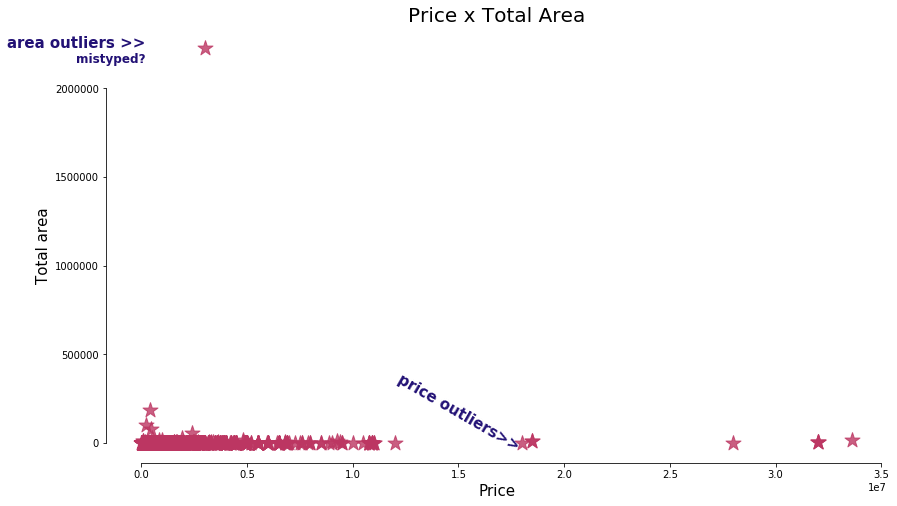

In [66]:
# set the the size of the plot
plt.figure(figsize=(14, 8))

# plot a scatter plot of price x total_area
ax = sns.regplot(data=properties_features, x="price", y="total_area", 
                 fit_reg=False, 
                 marker="*", 
                 scatter_kws={'s':250},
                 color="#bc3662")

# annotate the total_area outliers
ax.text(200000,2300000, "area outliers >>", 
        horizontalalignment='right',
        verticalalignment='top', 
        size=15, 
        color='#221175', 
        weight='bold')

ax.text(200000,2200000, "mistyped?",
        horizontalalignment='right',
        verticalalignment='top', 
        size='large', 
        color='#221175', 
        weight='bold')

# annotate the price outliers
ax.text(18000000,400000, "price outliers>>", 
        horizontalalignment='right',
        verticalalignment='top', 
        rotation=330,
        size=15, 
        color='#221175', 
        weight='bold')

# set the title and axis' names
plt.title('Price x Total Area', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Total area', fontsize=15)


# prettify the axies
sns.despine(trim=1)

plt.show()

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


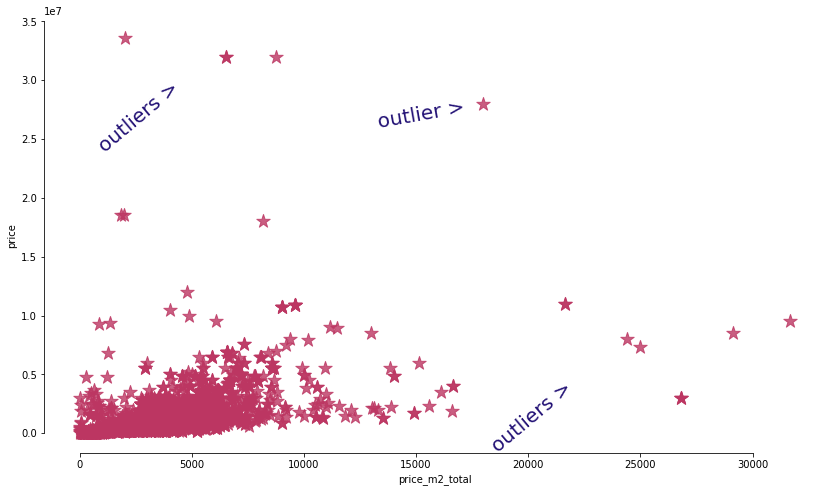

In [67]:
# set the the size of the plot
plt.figure(figsize=(14, 8))

# plot a scatter plot of price x total_area
ax = sns.regplot(data=properties_features, x="price_m2_total", y="price", 
                 fit_reg=False, 
                 marker="*", 
                 scatter_kws={'s':200},
                 color="#bc3662")

# annotate the outliers
ax.annotate("outliers >",
            xy=(15, 340),
            size=20,
            color='#221175',
            rotation=40,
            textcoords='offset points',
            )

ax.annotate("outliers >",
            xy=(400, 40),
            size=20,
            color='#221175',
            rotation=40,
            textcoords='offset points',
            )

ax.annotate("outlier >",
            xy=(290, 320),
            size=20,
            color='#221175',
            rotation=10,
            textcoords='offset points',
            )

# prettify the axies
sns.despine(trim=1)

plt.show()

### Price
__As mentioned before, the process of assessing if a property price is over overvalued, undervalued demand more information than we have. Despite the lack of information, let's face the challenge__

> playing around with deal (rent / sale) column

* Based on the title and feature columns, we found 2623 properties on sale, 59 on rent, 7 for selling or renting, and 2147 not labeled;

* From the 59 properties on rent, only 3 have valid cases in  the price column;

* We just can not get anything useful from this small date, but let's play with it and set the code for the next round after performing a second scrap with a complete information.

In [68]:
import numpy as np 

# clean the column deal
df_total = properties_features.replace('rentsale', '')
df_total = properties_features.replace('', np.nan)
df_total = properties_features.replace('cascaisalenquer', '')

# frequency of type of deal
print('Frequency of sale and rent properties:\n', df_total.deal.value_counts())
print('----------------------------')
print('Number of valid prices from renting properties:',
      properties_features.price[df_total.deal == 'rent'].notnull().sum())


Frequency of sale and rent properties:
 sale        2345
            2147
rent          59
rentsale       7
Name: deal, dtype: int64
----------------------------
Number of valid prices from renting properties: 3


## Part 1


In [69]:
# export data to a csv file
properties_features_clean.to_csv('properties_features.csv')

## Part 2

#### over-valued (0/1), under-valued (0/1), normal (0/1)
In order to classify the price into over, under and normal price, we may consider the price per m2;

The prices per m2 around the mean would be labeled as 'normal', the values above the mean over-valued, and the below the mean under-valued:
* normal: mean +- 1 str
* over-valued: above mean + 1 str 
* under-valued: below mean 1 1 str 

In [70]:
properties_features_clean.head(1)

,,title,total_area,price,agent_id,features_categ,text_data,fireplace,terrace,pool,suite,...,apartment,villa,loft,rent,sale,country,deal,type,location,price_m2_total
created_at,id,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1563980,"quinta - venda - abrigada e cabanas de torres,...",2230000.0,3000000.0,122,"campo, montanhas","campo, montanhasquinta - venda - abrigada e ca...",0,0,0,0,...,0,0,0,0,1,portugal,sale,,alenquer,1.345291


In [71]:
# select the cols
cols_price_m2 = ['id', 'location', 'type', 'total_area', 'price', 'price_m2_total', 'deal']

# slice the data
price_m2_df = properties_features_clean.reset_index()
price_m2_df = price_m2_df[cols_price_m2]

# rename the columns accordingly to the exercise
cols_rename = ['id','location name', 'type', 'area', 'price',
              'price_m2', 'deal']

price_m2_df.columns = cols_rename  

# clean the data excluding rent rows
price_m2_df = price_m2_df[price_m2_df.deal != 'rent']

# drop missing values
price_m2_df = price_m2_df[price_m2_df.price_m2.notnull()]

In [72]:
# some dispersion metrics about price m2
price_m2_df.price_m2.describe()

count     3206.000000
mean      3484.486186
std       2548.412349
min          1.345291
25%       1816.666667
50%       3000.000000
75%       4725.210872
max      31666.666667
Name: price_m2, dtype: float64

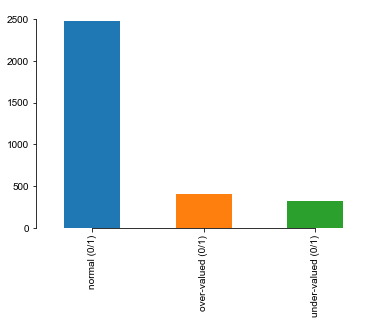

In [73]:
# Recode price_m2

under = price_m2_df.price_m2.mean()-price_m2_df.price_m2.std()
over = price_m2_df.price_m2.mean()+price_m2_df.price_m2.std()

recode_price_m2 = lambda x: "under-valued (0/1)" if x <= under else (
    "over-valued (0/1)" if x >= over else "normal (0/1)")

# call the function recode_price_m2
rec_price_m2 = price_m2_df.price_m2.apply(recode_price_m2)

# plot the results in a bar chart

rec_price_m2.value_counts().plot(kind='bar')

# pretiffy with seaborn <3
sns.set_style('ticks')
sns.despine(trim=1)
plt.show()

In [74]:
print(rec_price_m2.value_counts())

normal (0/1)          2482
over-valued (0/1)      403
under-valued (0/1)     321
Name: price_m2, dtype: int64


In [75]:
# get the dummines from the price_valued
price_valued_serie = pd.get_dummies(rec_price_m2)

# drop unsolicited col
part2_df = price_m2_df.drop(['price_m2', 'deal'], axis=1)

# concat the datasets
part2_final_df = pd.concat([part2_df, price_valued_serie], axis=1)

In [76]:
part2_final_df.head()

,id,location name,type,area,price,normal (0/1),over-valued (0/1),under-valued (0/1)
0,1563980,alenquer,,2230000.0,3000000.0,0,0,1
1,1641927,marbella,villa,844.0,2671000.0,1,0,0
2,2546019,alenquer,,51.0,38500.0,0,0,1
3,2786817,marbella,apartment,87.0,280000.0,1,0,0
4,2905657,alenquer,,119.0,76000.0,0,0,1


In [77]:
# deliver the csv
part2_final_df.to_csv('part2_final_df.csv')

## Part 3: Theoretical questions
- Mention at least 2 hidden traps you found while solving the problems and what would help you to clean the data set;
- Describe in detail how you would evaluate the price impact of features such as sea view, pool and garage considering the dataset provided. Your answer should also include how would you deal with missing values, outliers and duplicated listings (same property listing published by different agencies);

The first trap could be described as the text classification:
* Text in different languages, and so would be a good idea to translate into a single idiom;
* Different agents may use different words to describe the same property. It is worth to write a detailed dictionary to describe each feature;
* Regular expression is a little bit trick, and so requires double attention and triple check;

The second trap is dealing with missing data:
* Maybe using regression to estimate the missing cases from the quantitative variables, especially 'price' by creating a consistency imputer (not relying on mean or median).

The impact of the extracted features could be evaluated by coefficients from regressions (as in the logistic regression), or in a try and error to run some algorithms to classify the data.


## Extra challenge:
- Describe how would you model the data over time (using createdAt field). What changes over time would you look for and what would you expect the outcomes to be? (i.e. in terms of pricing per location/type)

* The price is higher from June to July, vacation time in Europe;
* There's also some peak on February and April;
* Portugal is the leading the prices, especially Cascais in Jun / Jul 2018;
* Despite the higher prices on Jun / Jul, the price / m2 reaches the top on March 2018, most influenced by Portugal;
* The 'villa' type of property presented the highest price per m2 comparing to the other types. The peak occurred on Mai 2017, followed by some a decreasing on the next months until rising again on March and June 2018;

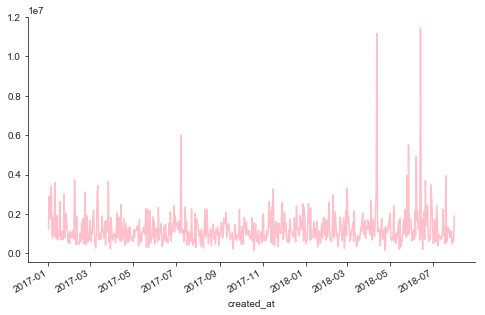

In [83]:
# mean prices over time
plt.figure(figsize=(8, 5))
properties_features_clean.groupby('created_at')['price'].mean().plot(color='pink')
sns.despine()

<Figure size 576x360 with 0 Axes>

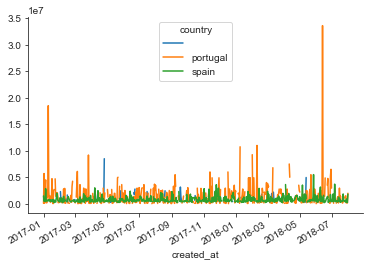

In [79]:
# groupby by 'created_at' and 'country' -- price
price_country =  properties_features_clean.groupby(['created_at', 'country'])['price'].median()

# unstack the data
price_country = price_country.unstack(level=0)

# plot
plt.figure(figsize=(8, 5))
price_country.T.plot()

sns.despine()

<Figure size 576x360 with 0 Axes>

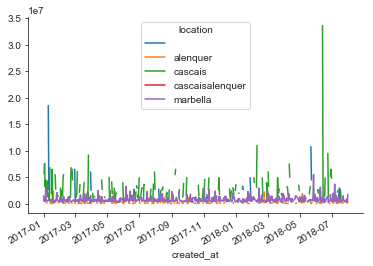

In [80]:
# groupby by 'created_at' and 'location' -- price
price_location =  properties_features_clean.groupby(['created_at', 'location'])['price'].median()

# unstack the data
price_location = price_location.unstack(level=0)

# plot
plt.figure(figsize=(8, 5))
price_location.T.plot()
sns.despine()


<Figure size 576x360 with 0 Axes>

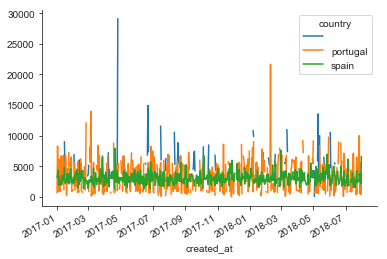

In [81]:
# groupby by 'created_at' and 'country' -- price per m2
price_m2_country =  properties_features_clean.groupby(['created_at', 'country'])['price_m2_total'].median()

# unstack
price_m2_country = price_m2_country.unstack(level=0)

# plot
plt.figure(figsize=(8, 5))
price_m2_country.T.plot()
sns.despine()


<Figure size 576x360 with 0 Axes>

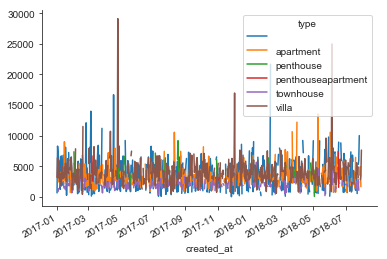

In [82]:
# groupby by 'created_at' and 'country' -- price per m2
price_m2_type =  properties_features_clean.groupby(['created_at', 'type'])['price_m2_total'].median()

# unstack
price_m2_type = price_m2_type.unstack(level=0)

# plot
plt.figure(figsize=(8, 5))
price_m2_type.T.plot()
sns.despine()
